In [26]:
from matplotlib import pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier
from mlp_predict_tools import gerador_de_csv_com_as_coordenadas_e_os_rotulos
import joblib
# Usado para criar a Matrix de Confusão
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib
# %matplotlib inline # para jupyter notebook

In [ ]:
# Código para garantir que o nome de cada arquivo de imagem seja um número inteiro e
# que os números sigam uma sequencia monotonica iniciando em 1
# o diretório relativo a letra T possuía problemas com os nomes de algumas imagens
# NÂO é necessário executar o código dessa célula, a menos que o conjunto de dados 
# com os nomes originais seja usado
lista_de_arquivos = []
for nome_do_arquivo in os.listdir('imagens/train/T'):
         if os.path.isfile(os.path.join('imagens/train/T', nome_do_arquivo)):
             lista_de_arquivos.append(nome_do_arquivo)
lista_de_arquivos.sort()
indice_inicial = 413
for i in range(indice_inicial, len(lista_de_arquivos)):
    nome_atual = f'./imagens/train/T/{lista_de_arquivos[i]}'
    novo_indice = i + 1
    nome_novo = f'./imagens/train/T/{novo_indice}.png'
    os.rename(nome_atual, nome_novo)

In [2]:
# Lista com nome de todos os diretórios
label = ["A","B","C","D","E","F","G","I","L","M","N","O","P","Q","R","S","T","U","V","W"]

# Landmarks: 
* WRIST
* THUMB_CMC
* THUMB_MCP
* THUMB_IP
* THUMB_TIP
* INDEX_FINGER_MCP
* INDEX_FINGER_PIP
* INDEX_FINGER_DIP
* INDEX_FINGER_TIP
* MIDDLE_FINGER_MCP
* MIDDLE_FINGER_PIP
* MIDDLE_FINGER_DIP
* MIDDLE_FINGER_TIP
* RING_FINGER_MCP
* RING_FINGER_PIP
* RING_FINGER_DIP
* RING_FINGER_TIP
* PINKY_MCP
* PINKY_PIP
* PINKY_DIP
* PINKY_TIP


In [8]:
gerador_de_csv_com_as_coordenadas_e_os_rotulos('test', 'normalizado')
gerador_de_csv_com_as_coordenadas_e_os_rotulos('test', 'centro_geometrico')
gerador_de_csv_com_as_coordenadas_e_os_rotulos('train', 'normalizado')
gerador_de_csv_com_as_coordenadas_e_os_rotulos('train', 'centro_geometrico')

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1718416732.079990   76349 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718416732.103516   76350 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


/home/codespace/.python/current/lib/python3.10/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [6]:
df_train = pd.read_csv('train_centro_geometrico.csv')
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']

In [7]:
df_test = pd.read_csv('test_centro_geometrico.csv')
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

In [17]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,100), random_state=1, max_iter = 10000)


In [18]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100), max_iter=10000,
              random_state=1, solver='lbfgs')

In [19]:
results = clf.score(X_test,y_test)

In [23]:
resultado_test = clf.predict(X_test)

In [24]:
class_test = y_test

In [30]:
acuracia = accuracy_score(resultado_test, class_test)
print(f"\nacurácia: {acuracia*100}%")
conf_matrix = confusion_matrix(resultado_test, class_test)
print(f"\nMatrix de Confusão: {conf_matrix}")


# Visualização da Matrz de confusão com seaborn
fig, axes = plt.subplots(1, 2, figsize=(200, 100), sharey=True)
fig.suptitle("Matrizes de Confusão")

sns.heatmap(ax=axes[0], data=conf_matrix, annot=True)
axes[0].set_title("Matriz de Confusão")

sns.heatmap(ax=axes[1], data=conf_matrix/np.sum(conf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
axes[1].set_title("Matriz de Confusão Percentual");
plt.show()



acurácia: 99.73348037864167%

Matrix de Confusão: [[538   0   0   0   0   0   0   0   0   0   0   7   0   0   0   0   0   0
    0   0]
 [  0 562   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   0 546   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 549   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 574   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 450   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 550   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 549   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   0   0   1   0   0   0   0 550   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 550   1   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 549   0   0   0   0   0   0   0
    0   0]
 [  1   0   5 

In [20]:
print(results)

0.9973348037864167


In [22]:
arquivo_joblib = "modelo_treinado_mediapipe_joblib.sav"
joblib.dump(clf, arquivo_joblib)

['modelo_treinado_mediapipe_joblib.sav']

In [11]:
df_results_compare = pd.DataFrame(results == y_test)
df_results_compare['label'].value_counts()
    

label
True     9042
False    1839
Name: count, dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Parâmetros
image_size = (64, 64)  
batch_size = 32
epochs = 20

# Caminhos para os dados
train_data_dir = 'imagens/train/'
test_data_dir = 'imagens/test/'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 33064 images belonging to 20 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 10998 images belonging to 20 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  

# Compilação do modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,780 (2.62 MB)

 Trainable params: 685,780 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinamento do modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    verbose=1
)

Epoch 1/20


C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 268s 256ms/step - accuracy: 0.4727 - loss: 1.6856
Epoch 2/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.9062 - loss: 0.3961 
Epoch 3/20


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 45s 44ms/step - accuracy: 0.9127 - loss: 0.2488
Epoch 4/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.9375 - loss: 0.2314  
Epoch 5/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.9431 - loss: 0.1605
Epoch 6/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.9375 - loss: 0.1358  
Epoch 7/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 43s 42ms/step - accuracy: 0.9598 - loss: 0.1101
Epoch 8/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.9375 - loss: 0.1021  
Epoch 9/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 52s 50ms/step - accuracy: 0.9701 - loss: 0.0849
Epoch 10/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step - accuracy: 0.9375 - loss: 0.0572  
Epoch 11/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 44s 43ms/step - accuracy: 0.9774 - loss: 0.0651
Epoch 12/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.9375 - loss: 0.1298  
Epoch 13/20
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - accuracy: 0.9793 - loss: 0.0602
Epoch 14/20
1033/

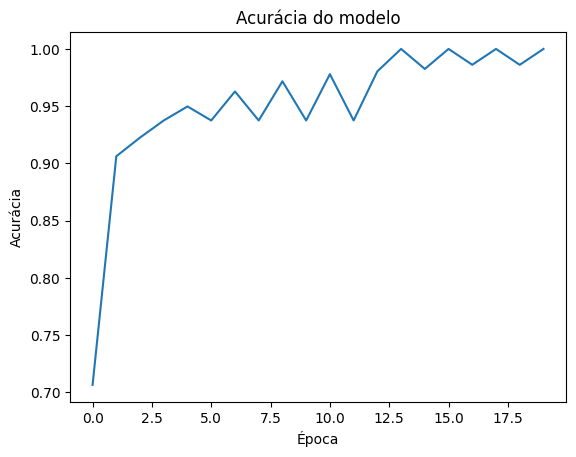

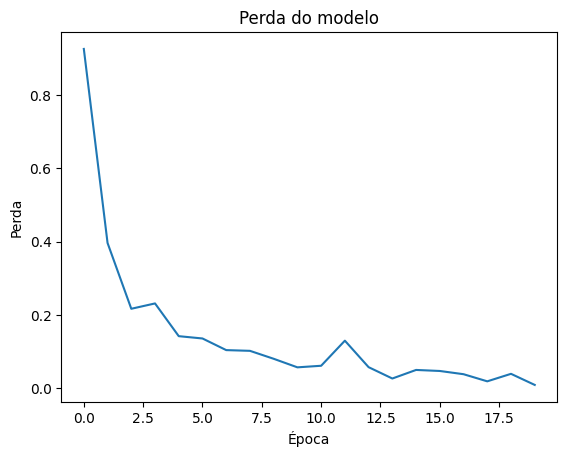

In [ ]:
import matplotlib.pyplot as plt

# Plotando a acurácia
plt.plot(history.history['accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.show()

# Plotando a perda
plt.plot(history.history['loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.show()


In [14]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Acurácia no conjunto de teste:', test_acc)

# Mapeamento das classes
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Exemplo de uma previsão
img_path = 'imagens/test/A/1.png'  # Exemplo de caminho da imagem
img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Fazer a previsão
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Obter o nome da classe prevista
classes = list(class_indices.keys())
predicted_label = classes[predicted_class]
print("Predicted Label:", predicted_label)


343/343 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9734 - loss: 0.1214
Acurácia no conjunto de teste: 0.9733054041862488
Class Indices: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'I': 7, 'L': 8, 'M': 9, 'N': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'U': 17, 'V': 18, 'W': 19}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Label: A
